In [1]:
# Especifando o problema das hidros no pymoo

import numpy as np
from pymoo.core.problem import Problem





class ProblemaHidro(Problem):
    

    
    def __init__(self):
        """
            x[0] -> t1
            x[1] -> t2
            x[2] -> t3
            x[3] -> x1
            x[4] -> x2
            x[5] -> x3    
        """
        lb = np.array([0,0,0,
                       0,0,0])
    
        ub = np.array([1000,1000,1000,
                       800,1000,1000]) # 0 <=x1<=800
        super().__init__(n_var=6, #numero de variaveis
                         n_obj=2, #numero de objetivos
                         n_ieq_constr=7, #numero de restricoes de ineq
                         xl=lb, #lower bound de x
                         xu=ub) #uppper bound de x        

    def _evaluate(self, x, out, *args, **kwargs):
        #v0=500
        #obs x1 -> x[6]; x2 -> x[7] ; x3 -> x[8]
        
        #0.2*(t1 + t2 +t3) + 0.005*(|v1 - v0| + |v2 - v1| + |v3 - v2|)
        f1 = 0.2*(x[:,0]+x[:,1]+x[:,2])
        
        f2 = 0.005* abs(500-x[:,3])+ abs(800-x[:,4])+ abs(200-x[:,5])
        
        out["F"] = np.column_stack([f1, f2])  # 'F' armazena função objetivo
        
        
        
         #restrições de inigualdade de demanda
        # 1.1*x1 + t1 >= 900;
        req1 = -1.1*x[:,3] - x[:,0] + 900
        
        #1.1*x2 + t2 >= 1000;
        req2 = -1.1*x[:,4] - x[:,1] + 1000;
        
        #1.1*x3 + t3 >= 950;
        req3 =  -1.1*x[:,5] - x[:,2] + 950;
        
        #800 - x1 - x2 <= 0
        req4 =  800-x[:,3] - x[:,4]
        
        # x1+x2-1600 <=0
        req5 =  x[:,3]+x[:,4]-1600
        
        #- x1-x2-x3 + 1000<=  0
        req6 =  -x[:,3]-x[:,4]-x[:,5]+1000
        
        # x1+x2+x3  - 1800 <= 0
        req7 = x[:,3]+x[:,4]+x[:,5]-1800
        
        
        out["G"] = [req1,req2, req3,req4,req5,req6,req7] # 'G' restricões ineq
        #out["G"] = np.column_stack([req1,req2, req3,
        #                            req4,req5,req6,req7]) # 'G' restricões ineq
        
        
      
        
        


meuproblema = ProblemaHidro()

In [2]:
# demo do site

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.pntx import TwoPointCrossover

from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.sampling.rnd import FloatRandomSampling

from pymoo.optimize import minimize


nsga2 = NSGA2(pop_size=50,
                  Verbose=True)

res = minimize(meuproblema,
               nsga2,
               seed=1,
               #verbose=True,
              save_history=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

print(f'''
            t1 -> {res.X[0]} 
            t2 -> {res.X[1]} 
            t3 -> {res.X[2]} 
            x1 -> {res.X[3]} 
            x2 -> {res.X[4]} 
            x3 -> {res.X[5]} ''')

     

Best solution found: 
X = [[ 20.25132365 120.00124013 730.00188621 799.86341565 800.00000144
  199.99937746]
 [356.45609533 120.00044512 730.17565279 500.00459684 800.00000044
  199.99972631]
 [339.07905098 120.00320083 730.00086691 516.53719562 800.00000056
  199.99962399]
 [256.28165451 121.7109361  730.0017887  588.66281449 800.00000046
  199.99966615]
 [149.63716713 120.00146933 730.04861488 682.69669149 800.00000048
  199.99962445]
 [202.9041896  120.00056066 730.00383497 633.97046754 800.00000069
  199.99946988]
 [176.70642806 120.00031412 730.00070113 658.83480734 800.00000064
  199.99936364]
 [298.90005584 120.00151651 730.00077094 547.0168534  800.00000064
  199.99946163]
 [344.0205707  120.0005249  730.00059392 506.10789884 800.00000041
  199.99946553]
 [233.70267095 120.00059894 730.00372983 607.409638   800.00000066
  199.99946531]
 [126.14631191 120.00793867 730.00433659 705.54425069 800.00000085
  199.99954818]
 [281.50495768 120.00019954 730.00839431 564.55816963 800.000

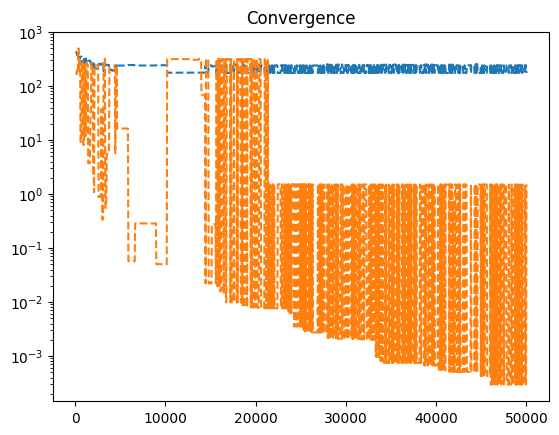

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])

plt.title("Convergence")
plt.plot(n_evals, opt, "--")
plt.yscale("log")
plt.show()

In [4]:
r = dict()
r['t1'] = res.X[0]
r['t2']     = res.X[1]
r['t3']  = res.X[2] 
r['x1'] = res.X[3] 
r['x2'] =res.X[4] 
r['x3'] =res.X[5]

print(1.1*r['x1'] + r['t1']) # >= 900;
print(1.1*r['x2'] + r['t2'])  #  >= 1000;
print(1.1*r['x3'] + r['t3'])  # >=950;



#v1 = v0 + 500 - x1;
#print(f"{r['v1']}  {500+500-r['x1']}")
#v2 = v1 + 800 - x2;
#print(f"{r['v2']}  {r['v1']+800-r['x2']}")
#v3 = v2 + 200 - x3;
#print(f"{r['v3']}  {r['v2']+200-r['x3']}")


print('---- calculando F ----')
v0=500
#0.2*(t1 + t2 +t3) + 0.005*(|v1 - v0| + |v2 - v1| + |v3 - v2|)
#print(0.2* (r['t1']+r['t2']+r['t3']) + 0.005*(abs(r['v1']-v0) + abs(r['v2']-r['v1'])+ abs(r['v3']-r['v2'])) )

[ 302.16114361  253.88326984 1533.00385378 1447.39251158 1680.00000194
  419.99901023]
[ 521.05697917  252.00206138 1533.22912916 1250.97095748 1680.00000097
  419.99931321]
[ 562.27365954  252.00381755 1533.00508537 1213.90470991 1680.00000132
  419.99904086]
---- calculando F ----
